In [1]:
# #import modules
# import os
# import glob
import pandas as pd
# from datetime import datetime
# os.chdir("D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios\\FinalCrashScenarios")
# all_filenames1 = [i for i in glob.glob('*.{}'.format('csv'))]
# combined_crash_csv = pd.concat([pd.read_csv(f) for f in all_filenames1])

# combined_crash_csv = combined_crash_csv.sample(frac=1).reset_index(drop=True)
# currentDateAndTime = datetime.now()
# currentDateTime = currentDateAndTime.strftime("%d_%m_%Y__%H_%M")
# csvname = "D:\\NewFinalDatasetsForNeuralNetwork\\Encap_25_50_75_crash_noncrash_combined_csv_"+ currentDateTime + ".csv"
# #export to csv
# combined_crash_csv.to_csv(csvname , index=False, encoding='utf-8-sig')

#importing dataset

combined_crash_csv = pd.read_csv("D:\\NewFinalDatasetsForNeuralNetwork\\Encap_25_50_75_crash_combined_csv_20_03_2023__21_52.csv")
combined_crash_csv

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,TTC
0,77.941482,-7.9,0.56,1.361111,5.436994
1,16.298392,-0.8,1.63,1.305556,0.996148
2,60.402328,-5.2,4.16,1.361111,4.198817
3,74.785708,-5.8,3.31,1.111111,5.228723
4,60.219342,-5.7,0.69,1.250000,4.160302
...,...,...,...,...,...
1186515,37.756630,-3.4,4.70,1.333333,2.558604
1186516,29.090621,-2.4,2.35,1.250000,1.921616
1186517,51.400099,-4.4,1.32,1.388889,3.528936
1186518,22.662374,-2.4,1.83,1.305556,1.456062


In [2]:
max(combined_crash_csv['TTC'])

7.679221757

In [3]:
combined_crash_csv.dropna()
combined_crash_csv.drop_duplicates()
combined_crash_csv = combined_crash_csv.drop(combined_crash_csv[combined_crash_csv['TTC'] < 0].index)

In [5]:
max(combined_crash_csv['TTC'])

7.679221757

In [6]:
dataset = combined_crash_csv
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,TTC
0,77.941482,-7.9,0.56,1.361111,5.436994
1,16.298392,-0.8,1.63,1.305556,0.996148
2,60.402328,-5.2,4.16,1.361111,4.198817
3,74.785708,-5.8,3.31,1.111111,5.228723
4,60.219342,-5.7,0.69,1.250000,4.160302
...,...,...,...,...,...
1186515,37.756630,-3.4,4.70,1.333333,2.558604
1186516,29.090621,-2.4,2.35,1.250000,1.921616
1186517,51.400099,-4.4,1.32,1.388889,3.528936
1186518,22.662374,-2.4,1.83,1.305556,1.456062


In [ ]:
# #import modules
# import os
# import glob
# import pandas as pd
# #os.chdir("D:\\CsvToCombine")
# filepath = 'D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios'
# dataset = pd.read_csv(filepath +'\\Crash_ENCAP50PedDir0.0-5.0_PedDirStep0.1LateralDist0.0-8.0_LateralDistStep0.1-_Dttime090320231312.csv')
# dataset

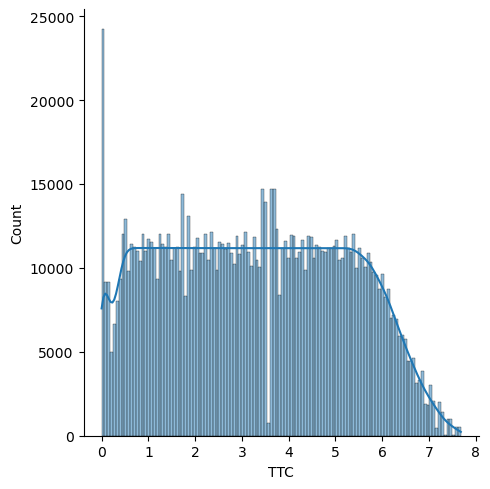

In [7]:
import seaborn as sns
sns.displot(dataset['TTC'], kde = True)

In [8]:
#Splitting TTC from the other columns
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split

# 80-20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# This cell is only used for plotting the training dataset in the below cell, alongwith the column names
joined_train_dataset = X_train
train_dataset = pd.DataFrame(joined_train_dataset, columns = ['NORMALIZED PEDESTRIAN POSITION X', 'NORMALIZED PEDESTRIAN POSITION Y', 'NORMALIZED PEDESTRIAN DIRECTION', 'NORMALIZED PEDESTRIAN SPEED'])
train_dataset.loc[:,'TTC'] = y_train
#print(train_dataset)

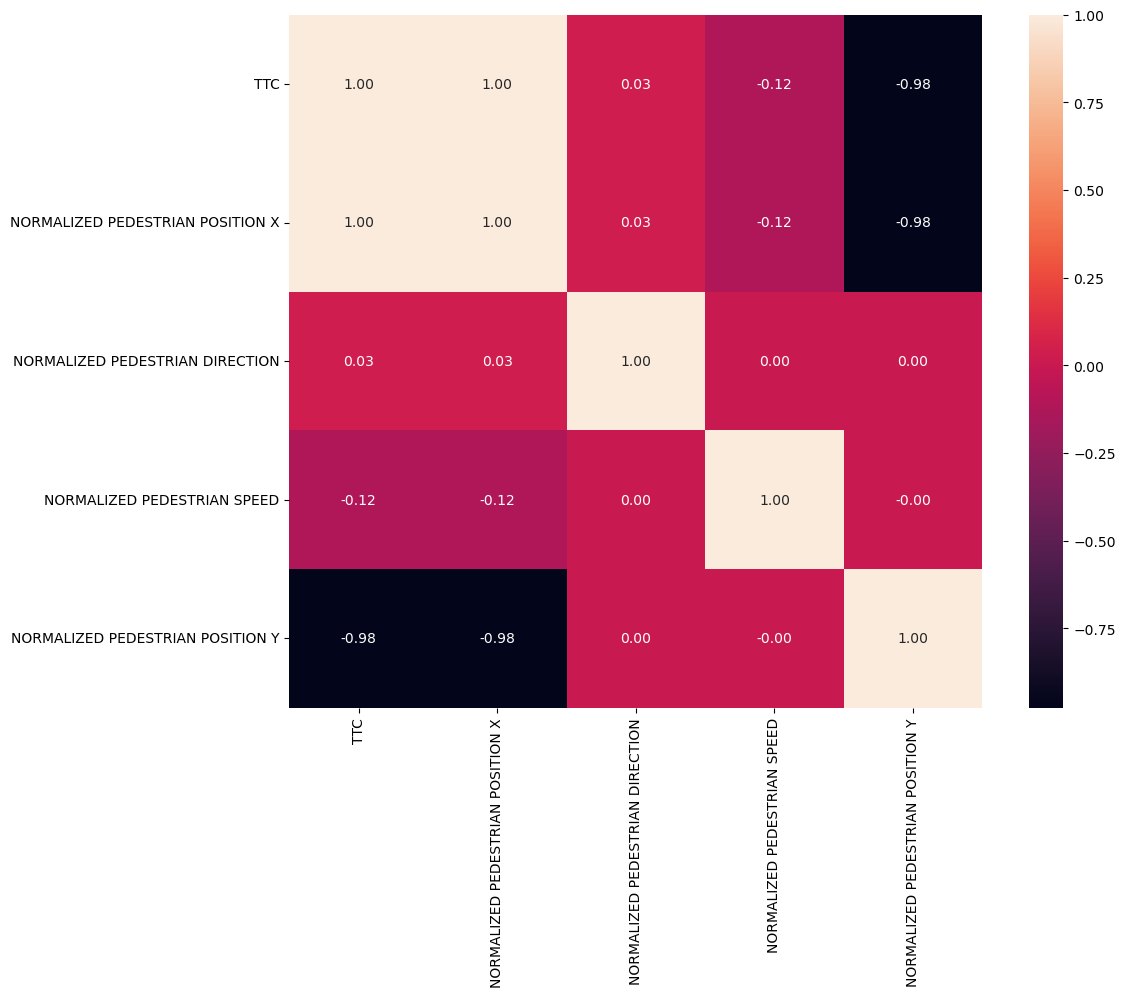

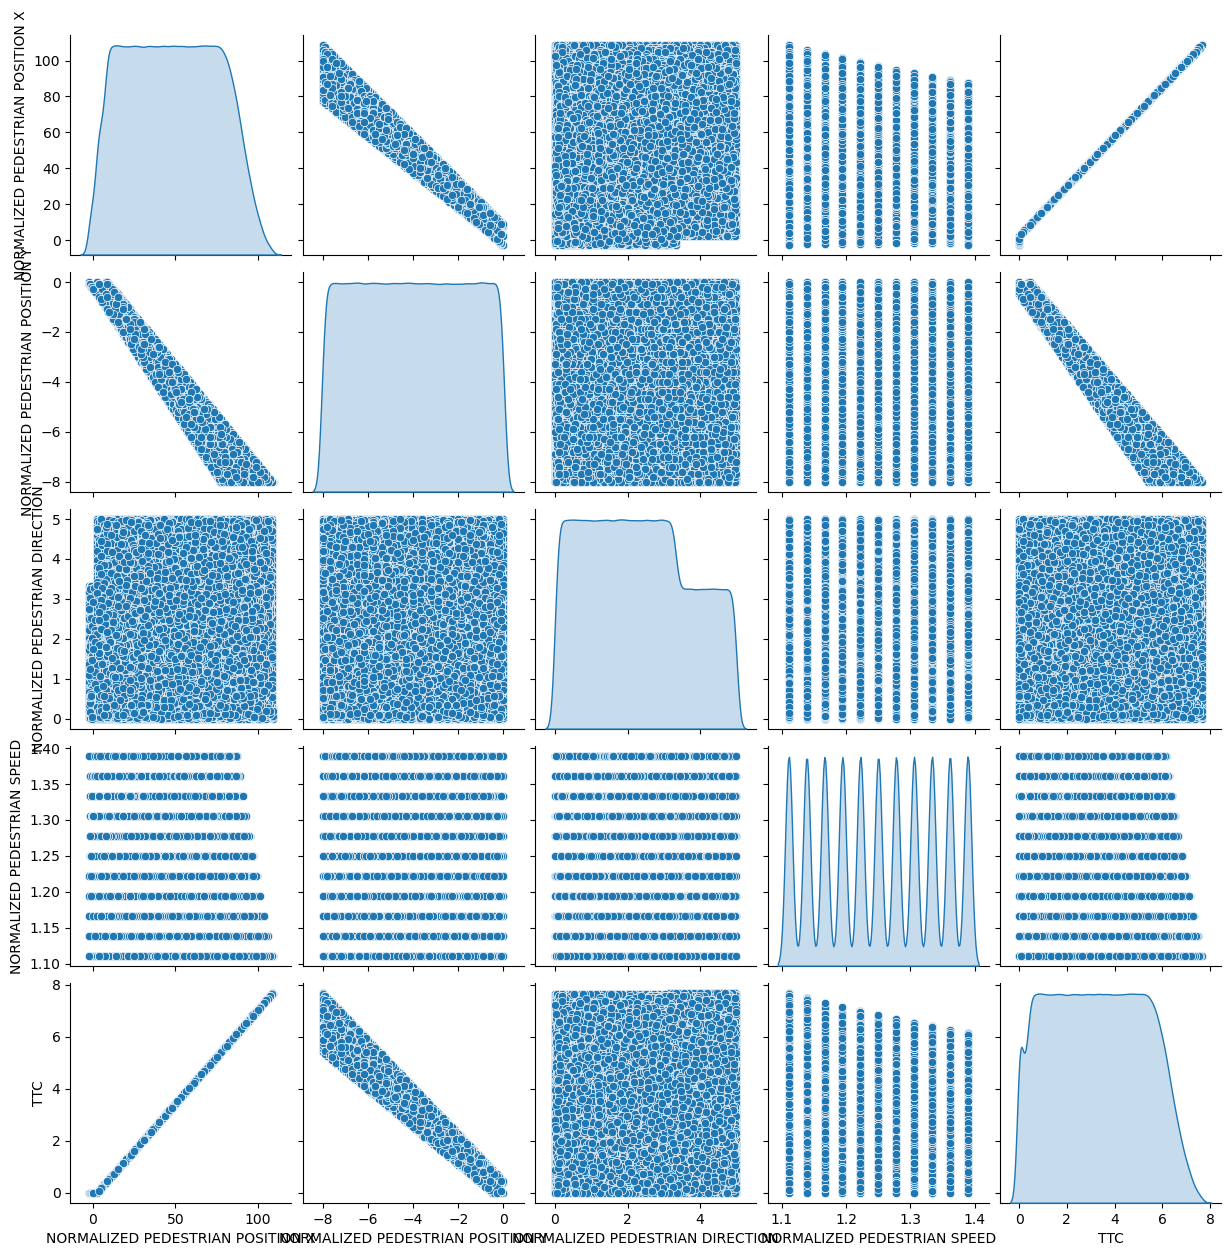

In [11]:
# Dataplots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = dataset.corr()
plt.subplots(figsize=(12,9))
k=10
cols = corr_matrix.nlargest(k,'TTC')['TTC'].index
cm = np.corrcoef(train_dataset[cols].values.T)

#sns.heatmap(corr_matrix, vmax=0.9, square=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Plotting the dataset columns to find patterns
sns.pairplot(train_dataset, diag_kind='kde')

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.utils import class_weight

# Defining first layer of the neural network, which normalizes the input data on the fly
normalizer_layer = keras.layers.Normalization(axis=-1)
normalizer_layer = layers.Normalization(input_shape=[4,], axis=None)
# Adapting normalizer layer to the input train data shape
normalizer_layer.adapt(np.array(X_train))
# # calculate class weights
# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights = dict(enumerate(class_weights))

# Defines the model and compilation
def build_and_compile_model(normalizer_layer):
  nn_model = keras.Sequential([
      normalizer_layer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  nn_model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['mse'])
  return nn_model

In [13]:
# Building the neural network model and compiling it using the normalization layer adapted to the shape of our input training dataset
regression_model = build_and_compile_model(normalizer_layer)
regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 4)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,964
Trainable params: 16,961
Non-trainable params: 3
____________________________________________________

In [15]:
# Report for training data for non linear model
#%%time
history = regression_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    #class_weight=class_weights,
    verbose=1,
# Calculate validation results on 20% of the training data.
    validation_split = 0.3)

Epoch 1/50
5192/5192 [==============================] - 31s 6ms/step - loss: 7.3630e-04 - mse: 7.3630e-04 - val_loss: 2.0173e-04 - val_mse: 2.0173e-04
Epoch 2/50
5192/5192 [==============================] - 34s 7ms/step - loss: 4.6228e-04 - mse: 4.6228e-04 - val_loss: 8.7854e-04 - val_mse: 8.7854e-04
Epoch 3/50
5192/5192 [==============================] - 31s 6ms/step - loss: 3.5644e-04 - mse: 3.5644e-04 - val_loss: 4.0936e-05 - val_mse: 4.0936e-05
Epoch 4/50
5192/5192 [==============================] - 31s 6ms/step - loss: 2.9838e-04 - mse: 2.9838e-04 - val_loss: 5.4927e-04 - val_mse: 5.4927e-04
Epoch 5/50
5192/5192 [==============================] - 31s 6ms/step - loss: 2.6850e-04 - mse: 2.6850e-04 - val_loss: 1.0642e-04 - val_mse: 1.0642e-04
Epoch 6/50
5192/5192 [==============================] - 34s 6ms/step - loss: 2.3708e-04 - mse: 2.3708e-04 - val_loss: 3.1850e-05 - val_mse: 3.1850e-05
Epoch 7/50
5192/5192 [==============================] - 33s 6ms/step - loss: 1.6752e-04 - mse:

In [ ]:
# regression_model.save('TTC_regression_model.h5')

In [23]:
regression_model.save('04_04_2023_TTC_regression_model.h5')

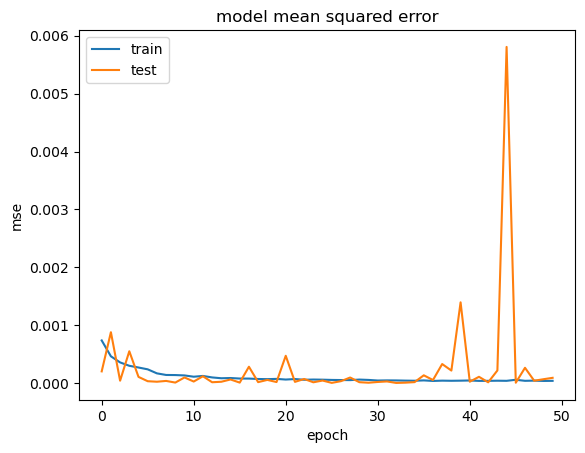

In [16]:
import matplotlib.pyplot as plt
# Summarize history for Loss function
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#Evaluating the model on the test data
regression_model.evaluate(X_test,y_test , verbose=1)

7416/7416 [==============================] - 19s 3ms/step - loss: 9.0759e-05 - mse: 9.0759e-05


[9.075874550035223e-05, 9.075874550035223e-05]

In [18]:
# Plotting Actual TTC values vs. predicted for the test set
def predict_and_plot(dnn_model, X_test, y_test):
    
    tf.data.experimental.enable_debug_mode()
    test_predictions = dnn_model.predict(X_test).flatten()

    a = plt.axes(aspect='equal')
    plt.scatter(y_test,test_predictions)
    plt.xlabel('True Values [TTC]')
    plt.ylabel('Predictions [TTC]')
    lims = [0, 10]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

7416/7416 [==============================] - 25s 3ms/step


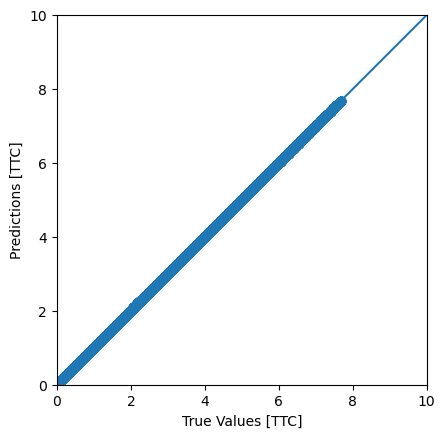

In [19]:
predict_and_plot(regression_model, X_test, y_test)

In [20]:
print(y_test[:20])
prediction = regression_model.predict(X_test[:20])
print(prediction.transpose())

[5.26979908 6.00801572 2.77941538 1.5088958  0.79024449 1.75910666
 4.88173491 1.84398133 2.10000259 0.72052147 1.64424515 0.49105778
 6.77798332 4.97939352 2.26050729 5.6015603  3.69446152 2.49795934
 2.46107008 3.89200655]
1/1 [==============================] - 0s 22ms/step
[[5.2703276 6.0063963 2.786746  1.5248439 0.8018242 1.7764826 4.882014
  1.8627703 2.1217632 0.7337129 1.6613007 0.5023949 6.7768245 4.981145
  2.2824254 5.5965986 3.699892  2.511004  2.4713001 3.8943872]]
